### Sebastián Rodríguez
### 20003076


                    #Práctica 1 : Clustering y detección de anomalías
                    
                  

In [183]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

### Soft Cluster

In [29]:
data = pd.read_csv("estaturas1.csv",delimiter=';')
type(data)
data.shape
data

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


In [44]:
modelo = KMeans()

In [45]:
modelo.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
print('\n # Cluster por Default : ',modelo.n_clusters)


 # Cluster por Default :  8


In [50]:
yhat = modelo.predict(data)

### Prueba con diferentes K 

In [86]:
modelo2 = KMeans(n_clusters = 2)

In [87]:
modelo3 = KMeans(n_clusters = 2)

In [88]:
modelo4 = KMeans(n_clusters = 2)

In [89]:
modelo5 = KMeans(n_clusters = 2)

In [90]:
modelo2.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
modelo3.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
modelo4.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [94]:
modelo5.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
prediccion2 = modelo2.predict(data)
prediccion2

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0])

In [96]:
prediccion3 = modelo2.predict(data)
prediccion3

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0])

In [97]:
prediccion4 = modelo2.predict(data)
prediccion4

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0])

In [98]:
prediccion5 = modelo2.predict(data)
prediccion5

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0])

### Hard-Clustering

In [124]:
data2 = np.vstack(data)
print(data.groupby('Edad').size())

Edad
21    1
23    1
24    3
25    5
26    4
27    3
28    1
29    2
31    1
32    2
34    4
38    1
40    1
dtype: int64


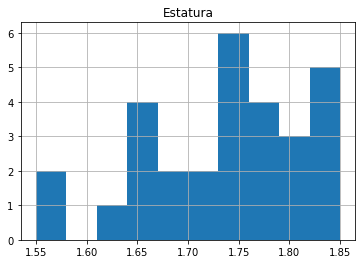

In [102]:
data.drop(['Edad'],1).hist()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


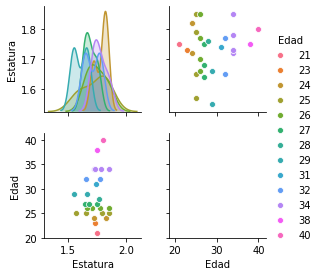

In [106]:
sb.pairplot(data.dropna(), hue='Edad',size=2,vars=["Estatura", "Edad"],kind='scatter')

In [175]:
def generar_centro(data, k):
    
    n = data.shape[0]
    c = data.shape[1]
    avg = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    centers = np.random.randn(k, c)  

    return centers

In [176]:
centros_random = generar_centro(data,32)
centros_random

array([[ 2.18609495,  1.77857249],
       [ 0.3401741 , -0.21351859],
       [ 1.11773591,  0.94702945],
       [ 0.2630036 , -1.86793528],
       [-0.3916012 , -1.15141763],
       [ 0.09743798,  1.58203196],
       [-0.48286855,  0.19991277],
       [-0.29465727,  0.97823615],
       [-0.03008042, -0.68652344],
       [ 0.04974017,  1.33764141],
       [-0.2327679 ,  0.55370177],
       [-1.52007408,  1.19279792],
       [ 0.52518578, -0.84640754],
       [-0.1968985 , -0.86301704],
       [ 0.98530909, -0.03143433],
       [-0.98463583,  2.24698967],
       [-0.05358755,  0.55642577],
       [-2.00653453, -0.68322017],
       [ 0.46313872, -0.56406935],
       [-0.40408192, -1.638067  ],
       [-0.15125239,  0.90744408],
       [ 0.0673945 ,  0.69049189],
       [-0.06996847,  0.74731893],
       [-0.30642407,  0.18199109],
       [-0.07213603,  2.21796653],
       [ 0.2584544 , -0.73603076],
       [ 0.31125086, -0.11879521],
       [ 0.77047831, -1.14883292],
       [-0.27289366,

In [177]:
centros_random = generar_centro(data,3)
centros_random

array([[ 1.61904563,  0.21215972],
       [ 0.03181006,  1.20272375],
       [ 0.29745439, -0.75361164]])

In [178]:
centros_random = generar_centro(data,4)
centros_random

array([[-0.21495011, -0.41238072],
       [-1.07824164,  1.2124852 ],
       [-0.35463776, -0.46698477],
       [-0.66643198, -0.24249065]])

In [179]:
centros_random = generar_centro(data,5)
centros_random

array([[-1.0844555 , -0.07992433],
       [ 0.805794  , -0.04241359],
       [-0.69537307, -0.13390765],
       [-1.95027664, -0.63517242],
       [ 0.76579565, -0.63968302]])

In [180]:
def kmeans_numpy(centers):
        viejo_centro = np.zeros(centers.shape)
        centro_nuevo = centers[:]
        clusters = np.zeros(n)
        distancias = np.zeros((n, k))
        error = np.linalg.norm(centro_nuevo - viejo_centro)

        while error != 0:
            for i in range(k):
                distancias[:, i] = np.linalg.norm(data - centers[i], axis=1)
            clusters = np.argmin(distancias, axis=1)
            viejo_centro = centro_nuevo[:]
            for i in range(k):
                centro_nuevo[i] = np.mean(data[clusters == i], axis=0)
            error = np.linalg.norm(centro_nuevo - viejo_centro)
        return centro_nuevo

In [ ]:
nuevos_centros = kmeans_numpy(centros_random)

# Conclusión - Parte 1

Podemos observar un mejor ajuste de los centroides utilizando la opción de Numpy en comparación de Sklearn. 

Para este ejercicio en particular no considero necesario utilizar el método del codo ya que la cantidad de datos son pequeños y puede apreciarse claramente por medio de gráficas el comportamiento de los datos y como elegir adecuadamente una K. Del software Sklearn podemos deducir que el software sugiere un k = 8 para realizar la ejecución del algoritmo. Nosotros al tener que experimentar decidimos empezar desde el 1 hasta el 5 para observar el comportamiento y agrupación de datos. 

Para GMM no tenemos una probabilidad muy grande de abarcar todos los grupos ya que la distribución se encuentra derivada en un rango muy amplio. A simple vista de la distribución de histograma y dispersión podemos observar que tiene una tendencia de los 24 a 26 años de la población con una altura parecida. 

# Detección de anomalías

In [212]:
datap2 = pd.read_csv("estaturas2.csv",delimiter=';')
type(datap2)
datap2.shape
datap2

,Estatura,Edad
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [189]:
a = np.cov(data.values.T)
b = np.mean(data.values, axis =0)

In [196]:
modelo_gaussiano = multivariate_normal(mean=b, cov=a)

In [197]:
x, y = np.meshgrid(np.linspace(data.Estatura.min()-0.1, data.Estatura.max()+0.1, 100)
z_pdf = modelo_gaussiano.pdf(np.dstack((x, y)))

In [204]:
def Anomalias(modelo_gaussiano, ob, ep =0.1):
    probabilidad = modelo_gaussiano.pdf(ob)
    if probabilidad < ep:
        print ("Detecto anomalia")
        return 1
    else:
        print("No hay anomalia")
        return 0

In [205]:
ob = data.sample(1).values

print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob)

Ejemplo:  [[ 1.74 31.  ]]
No hay anomalia


0

In [207]:
ob = data.sample(1).values

print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob)

Ejemplo:  [[ 1.75 38.  ]]
Detecto anomalia


1

In [211]:
ob = data.sample(1).values

#UMBRAL MAS ELEVADO
print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob, ep =0.5)

Ejemplo:  [[ 1.77 26.  ]]
Detecto anomalia


1

# Utilizando Pestaña 2

In [213]:
ob = datap2.sample(1).values

print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob)

Ejemplo:  [[ 1.76 32.  ]]
No hay anomalia


0

In [214]:
ob = datap2.sample(1).values

print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob)

Ejemplo:  [[ 1.6 35. ]]
Detecto anomalia


1

In [215]:
ob = datap2.sample(1).values

print("Ejemplo: ", ob)
Anomalias(modelo_gaussiano, ob)

Ejemplo:  [[ 1.61 31.  ]]
Detecto anomalia


1